In [60]:
import pandas as pd
workshop = pd.read_csv('/Users/jacobyang/Downloads/Fall 2021 Week 4 Workshop #2.csv')
workshop

,Meeting ID,Topic,Start Time,End Time,User Email,Duration (Minutes),Participants,Unnamed: 7
0,93871555154,UES Externship Program: Resumes and Interviews,10/18/2021 05:59:42 PM,10/18/2021 08:32:36 PM,yrzhang@ucsd.edu,153,109,NaN
1,Name (Original Name),User Email,Join Time,Leave Time,Duration (Minutes),Guest,Recording Consent,NaN
2,Rachel Zhang | UES VP Marketing (Rachel Zhang),yrzhang@ucsd.edu,10/18/2021 05:59:41 PM,10/18/2021 07:59:30 PM,120,No,NaN,NaN
3,Phillip Tan,p5tan@ucsd.edu,10/18/2021 06:00:04 PM,10/18/2021 06:00:25 PM,1,No,NaN,NaN
4,Phillip Tan | UES President (Phillip Tan),p5tan@ucsd.edu,10/18/2021 06:00:25 PM,10/18/2021 07:55:46 PM,116,No,NaN,NaN
...,...,...,...,...,...,...,...,...
310,Lucien Chen,chenlucien0776@students.esuhsd.org,10/18/2021 08:17:57 PM,10/18/2021 08:18:11 PM,1,Yes,NaN,NaN
311,Kelly Yu,kgyu@ucsd.edu,10/18/2021 08:18:06 PM,10/18/2021 08:18:11 PM,1,No,NaN,NaN
312,Andy Cho,smc005@ucsd.edu,10/18/2021 08:18:06 PM,10/18/2021 08:18:42 PM,1,No,NaN,NaN
313,Kelly Yu,kgyu@ucsd.edu,10/18/2021 08:18:12 PM,10/18/2021 08:18:39 PM,1,No,NaN,NaN


In [61]:
workshop = workshop.get(['Meeting ID', 'Topic', 'User Email'])


In [62]:
workshop.rename(columns = {'Meeting ID':'Name', 'Topic':'Email', 'User Email':'Duration (Minutes)'}, inplace = True)

/Users/jacobyang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [63]:
workshopReduced = workshop.drop([0,1]).reset_index().get(['Email', 'Duration (Minutes)'])
workshopReduced

,Email,Duration (Minutes)
0,yrzhang@ucsd.edu,120
1,p5tan@ucsd.edu,1
2,p5tan@ucsd.edu,116
3,smchoi@ucsd.edu,1
4,smchoi@ucsd.edu,116
...,...,...
308,chenlucien0776@students.esuhsd.org,1
309,kgyu@ucsd.edu,1
310,smc005@ucsd.edu,1
311,kgyu@ucsd.edu,1


In [64]:
workshopReduced['Duration (Minutes)'] = workshopReduced['Duration (Minutes)'].astype(int)

In [65]:
workshopReduced = workshopReduced.groupby(by=['Email']).sum()
workshopReduced
#workshop1.get(['Name'])
#columnNames = workshop1['Name']
#workshopNames = columnNames.copy()
#workshopNames
#workshopNames
#workshop1['Name'] = workshopNames
#workshop1

,Duration (Minutes)
Email,
a1son@ucsd.edu,88
a3sinha@ucsd.edu,88
achow@ucsd.edu,110
admody@ucsd.edu,113
ajahmad@ucsd.edu,109
...,...
y3ge@ucsd.edu,85
yechoi@ucsd.edu,90
yol045@ucsd.edu,109


In [66]:
selectedColumn = workshopReduced['Duration (Minutes)']
workshopTimes = selectedColumn.copy()
workshopTimes

Email
a1son@ucsd.edu       88
a3sinha@ucsd.edu     88
achow@ucsd.edu      110
admody@ucsd.edu     113
ajahmad@ucsd.edu    109
                   ... 
y3ge@ucsd.edu        85
yechoi@ucsd.edu      90
yol045@ucsd.edu     109
yrzhang@ucsd.edu    154
zgee@ucsd.edu        90
Name: Duration (Minutes), Length: 89, dtype: int64

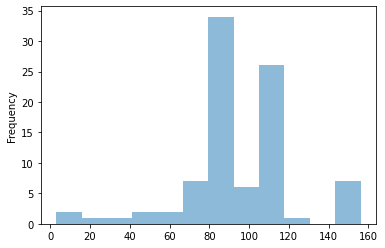

In [67]:
ax = workshopTimes.plot.hist(bins=12, alpha=0.5)

In [68]:
workshopReduced.rename(columns = {'Duration (Minutes)': 'W4 WS #2'}, inplace = True)
workshopReduced = workshopReduced.reset_index()
workshopReduced

,Email,W4 WS #2
0,a1son@ucsd.edu,88
1,a3sinha@ucsd.edu,88
2,achow@ucsd.edu,110
3,admody@ucsd.edu,113
4,ajahmad@ucsd.edu,109
...,...,...
84,y3ge@ucsd.edu,85
85,yechoi@ucsd.edu,90
86,yol045@ucsd.edu,109
87,yrzhang@ucsd.edu,154


In [69]:
workshopReduced.get('Email').iloc[19] = 'lqchen@ucsd.edu'
workshopReduced.get('Email').iloc[29] = 'glukanc@ucsd.edu'
workshopReduced = workshopReduced.drop(workshopReduced.index[55])
workshopReduced.get('W4 WS #2').iloc[55] = 88
workshopReduced = workshopReduced.groupby('Email').sum()
workshopReduced = workshopReduced.reset_index()
workshopReduced

/Users/jacobyang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Email,W4 WS #2
0,a1son@ucsd.edu,88
1,a3sinha@ucsd.edu,88
2,achow@ucsd.edu,110
3,admody@ucsd.edu,113
4,ajahmad@ucsd.edu,109
...,...,...
82,y3ge@ucsd.edu,85
83,yechoi@ucsd.edu,90
84,yol045@ucsd.edu,109
85,yrzhang@ucsd.edu,154
